# Authored by Melvern Amadio hidayat
## Using Google Colab & T4 Processor


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/fruit_dataset.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/fruit_dataset.zip
replace fruit_dataset/Dataset2C/cashew/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
from PIL import Image

def extract_rgb_from_image(image):
  rgb_img = np.asarray(image)
  vector_img = rgb_img.reshape(1, -1, 3)
  bins = (vector_img).astype(int)

  return rgb_img,bins[0, :, 0],bins[0, :, 1],bins[0, :, 2]

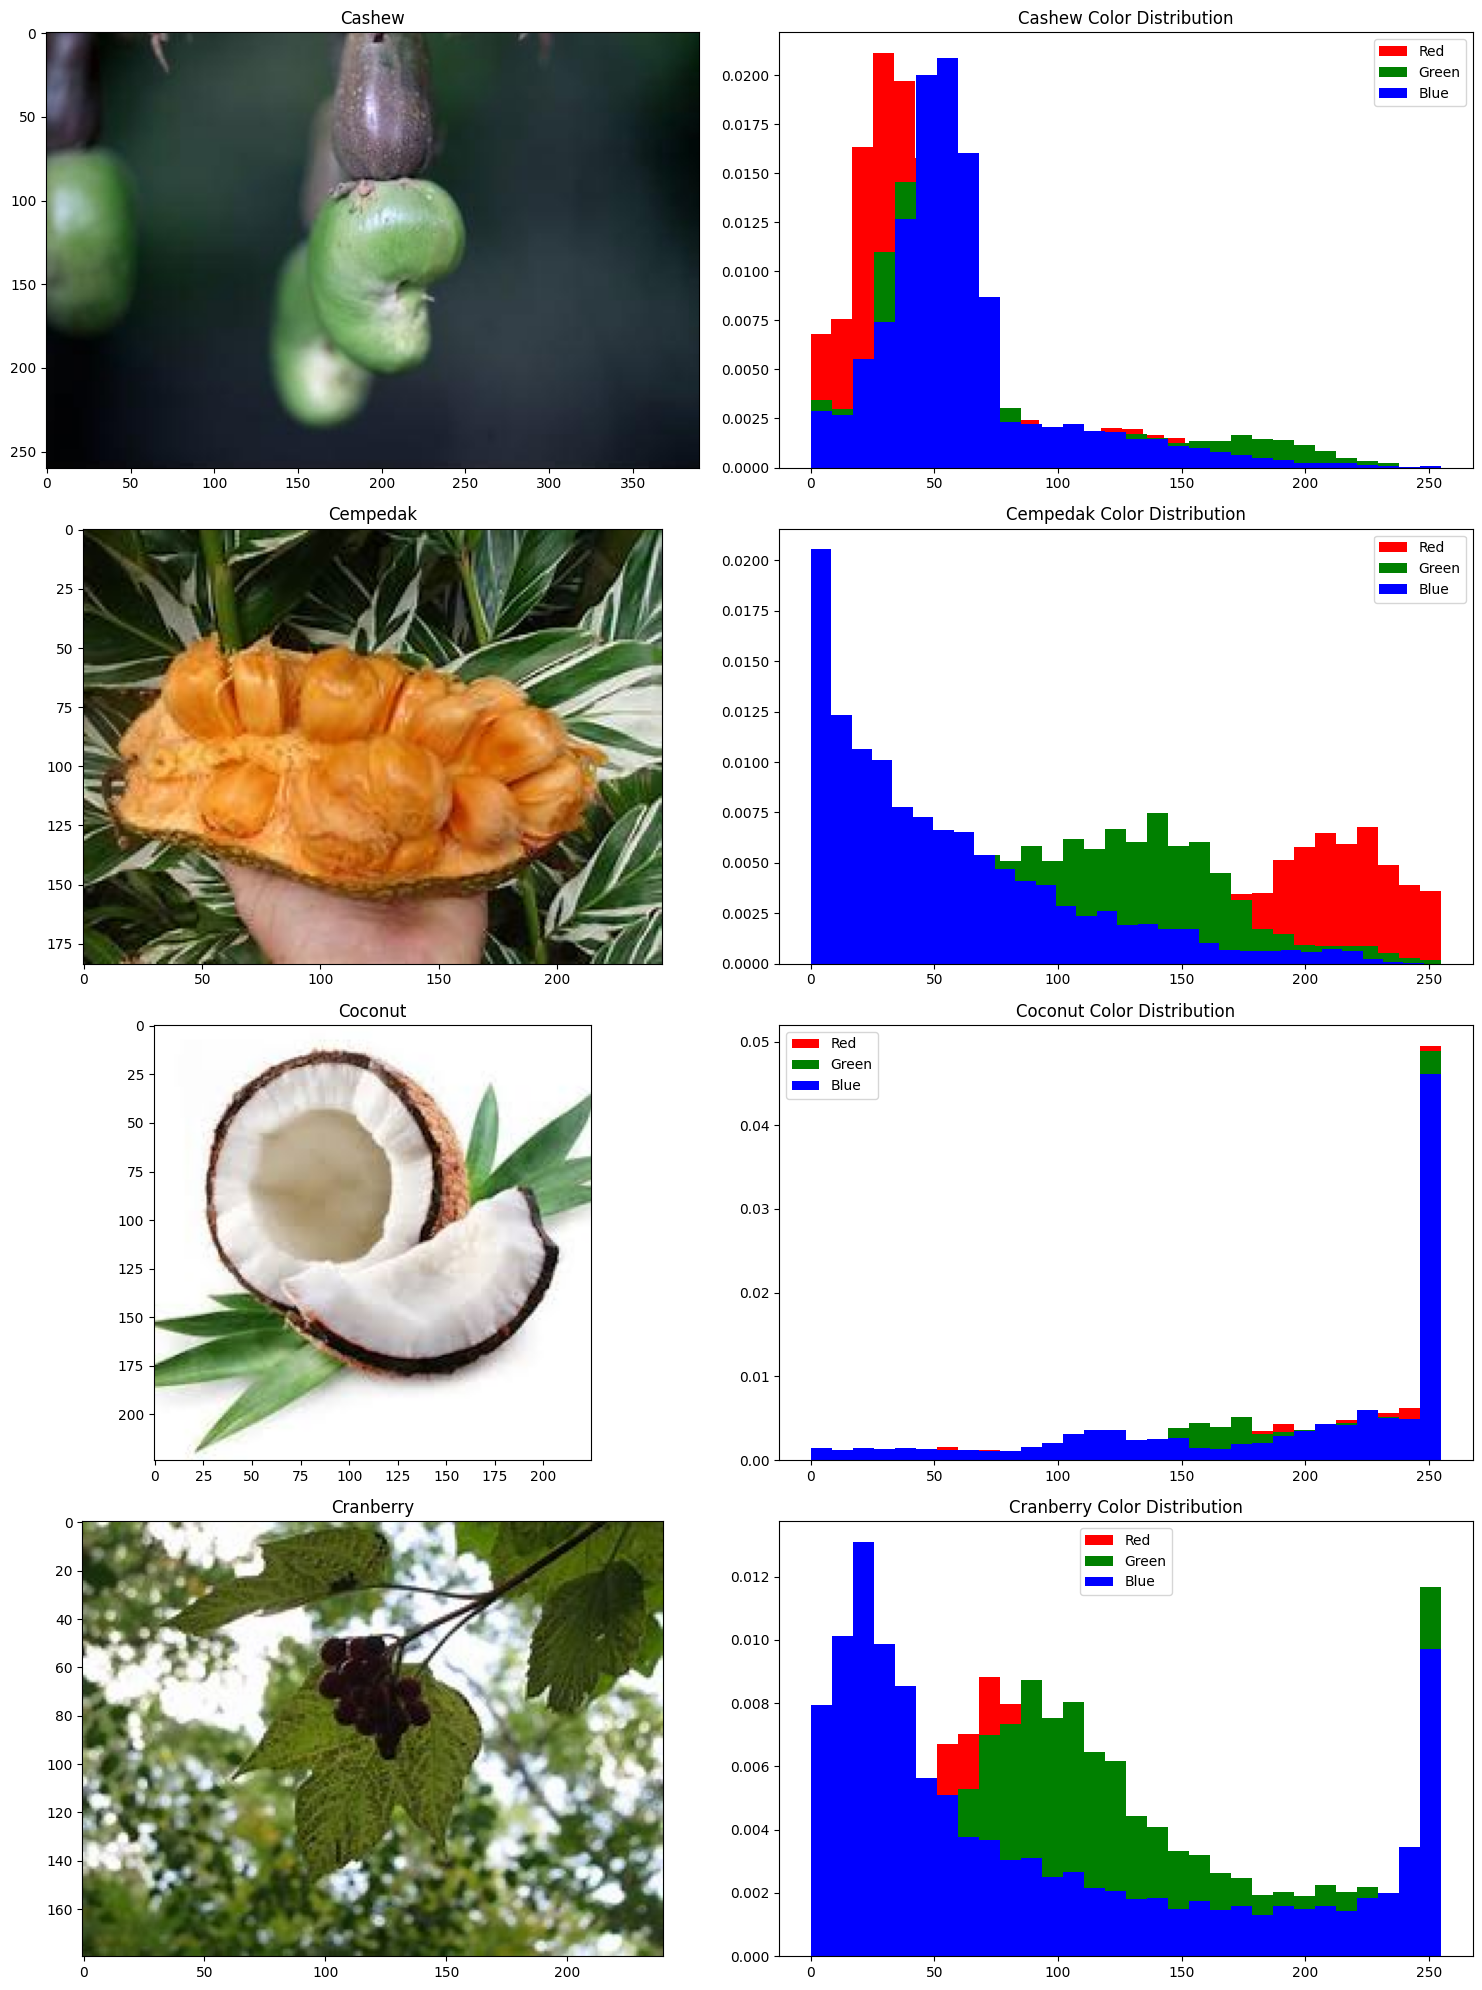

In [4]:
#histogram color in red green & blue
from matplotlib import pyplot as plt
import numpy as np

fig,axes = plt.subplots(4,2,figsize = (15,20))
sample_image = ['/content/fruit_dataset/Dataset2C/cashew/1003.jpg',
                '/content/fruit_dataset/Dataset2C/cempedak/1012.jpg',
                '/content/fruit_dataset/Dataset2C/coconut/213.jpg',
                '/content/fruit_dataset/Dataset2C/cranberry/162.jpg']

for i in range(4):
  image = Image.open(sample_image[i])
  vector_img,r,g,b = extract_rgb_from_image(image)
  fruit = sample_image[i].split('/')[-2].capitalize()
  axes[i,0].imshow(vector_img)
  axes[i,0].set_title(fruit)

  axes[i,1].set_title(f'{fruit} Color Distribution')
  axes[i,1].hist(r,label = 'Red',bins = 30,color = 'red',density = True)
  axes[i,1].hist(g,label = 'Green',bins = 30, color = 'green',density = True)
  axes[i,1].hist(b,label = 'Blue',bins = 30 , color = 'blue',density = True)
  axes[i,1].legend()

fig.tight_layout()

In [5]:
#Data Augmentation
#Buat direkotriat baru khusus untuk data segmented
import os
import shutil

fruit_list = ['cashew','cempedak','coconut','cranberry']
base_path = '/content/fruit_dataset/Dataset2C'
segmented_data = '/content/segmented_dataset'
train_size = 0.8   #Training set 80%

#os.makedirs(segmented_data)

In [6]:
for fruits in fruit_list:
    folder_path = os.path.join(base_path, fruits)
    all_fruit_files = os.listdir(folder_path)

    train_length = round(len(all_fruit_files) * train_size)
    test_length = round(len(all_fruit_files) * (train_size + 0.1))

    val_files, train_files, test_files = all_fruit_files[train_length:test_length],all_fruit_files[:train_length], all_fruit_files[test_length:]
    #train_files, val_files, test_files =  all_fruit_files[:train_length], all_fruit_files[train_length:test_length], all_fruit_files[test_length:]
    split_data = [("train", train_files), ("val", val_files), ("test", test_files)]

    for data_type, file_list in split_data:
      target_dir = os.path.join(segmented_data, data_type, fruits)
      os.makedirs(target_dir, exist_ok=True)

      for file_names in file_list:
        source_path = os.path.join(folder_path,file_names)
        target_path = os.path.join(target_dir, file_names)
        print(source_path)
        print(target_path)
        shutil.copy2(source_path, target_path)

/content/fruit_dataset/Dataset2C/cashew/497.jpg
/content/segmented_dataset/train/cashew/497.jpg
/content/fruit_dataset/Dataset2C/cashew/369.jpg
/content/segmented_dataset/train/cashew/369.jpg
/content/fruit_dataset/Dataset2C/cashew/898.jpg
/content/segmented_dataset/train/cashew/898.jpg
/content/fruit_dataset/Dataset2C/cashew/108.jpg
/content/segmented_dataset/train/cashew/108.jpg
/content/fruit_dataset/Dataset2C/cashew/325.jpg
/content/segmented_dataset/train/cashew/325.jpg
/content/fruit_dataset/Dataset2C/cashew/658.jpg
/content/segmented_dataset/train/cashew/658.jpg
/content/fruit_dataset/Dataset2C/cashew/686.jpg
/content/segmented_dataset/train/cashew/686.jpg
/content/fruit_dataset/Dataset2C/cashew/486.jpg
/content/segmented_dataset/train/cashew/486.jpg
/content/fruit_dataset/Dataset2C/cashew/213.jpg
/content/segmented_dataset/train/cashew/213.jpg
/content/fruit_dataset/Dataset2C/cashew/318.jpg
/content/segmented_dataset/train/cashew/318.jpg
/content/fruit_dataset/Dataset2C/cashew/

In [7]:
#Data Segmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_dir_path = '/content/segmented_dataset/val'
train_dir_path = '/content/segmented_dataset/train'
test_dir_path = '/content/segmented_dataset/test'

val = ImageDataGenerator(rescale = 1./255)
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)

In [8]:
#set new train, test and validation data generator
val_generate = val.flow_from_directory(val_dir_path,target_size = (224,224),batch_size = 8,class_mode = 'categorical')
train_generate = train.flow_from_directory(train_dir_path,target_size = (224,224),batch_size = 8,class_mode = 'categorical')
test_generate = test.flow_from_directory(test_dir_path,target_size = (224,224),batch_size = 8,class_mode = 'categorical')

Found 161 images belonging to 4 classes.
Found 1288 images belonging to 4 classes.
Found 161 images belonging to 4 classes.


In [9]:
#set new train, test and validation data generator
val_generate = val.flow_from_directory(val_dir_path,target_size = (224,224),batch_size = 8,class_mode = 'categorical')
train_generate = train.flow_from_directory(train_dir_path,target_size = (224,224),batch_size = 8,class_mode = 'categorical')
test_generate = test.flow_from_directory(test_dir_path,target_size = (224,224),batch_size = 8,class_mode = 'categorical')

Found 161 images belonging to 4 classes.
Found 1288 images belonging to 4 classes.
Found 161 images belonging to 4 classes.


In [10]:
#fruit classification
true_classes = test_generate.classes
print(test_generate.class_indices)

{'cashew': 0, 'cempedak': 1, 'coconut': 2, 'cranberry': 3}


# Image Quality #
Dalam data folder yang diberikan, ukuran & resolusi gambar yang ada sangat beragam. Hal ini membuat informasi yang dberikan oleh gambar menjadi tidak sama.

Contoh :

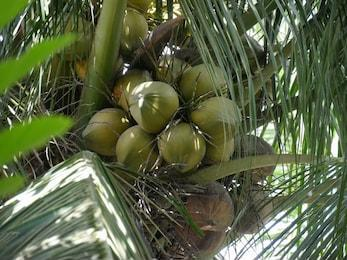

In [11]:
coconut_1 = Image.open('/content/fruit_dataset/Dataset2C/coconut/1018.jpg')
coconut_1

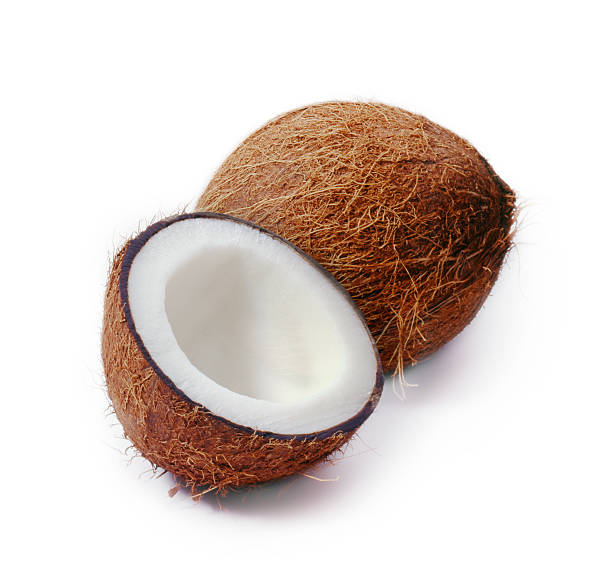

In [12]:
coconut_2 = Image.open('/content/fruit_dataset/Dataset2C/coconut/158.jpg')
coconut_2

Dari 2 gambar ini bisa kita lihat dari segi kualitas dan ukurannya ini memengaruhi terhadap informasi yang diberikan. Semakin besar resolusi gambarnya , maka semakin banyak fitur detail yang bisa didapatkan. Namun sebaliknya, semakin kecil resolusi gambarnya, maka semakin sedikit fitur detail yang bisa didapatkan.

Gambar noise pun jika bisa menjadi tantangan tersendiri, dimana gambar noise
disebabkan karena pencahayaan yang buruk atau kualitas kamera yang kurang baik sehingga gambar menjadi kurang jelas. Model akan kesulitan pada saat memisahkan mana bagian gambar yang asli dan mana yang noise.

Contoh :

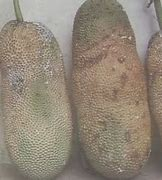

In [13]:
noise = Image.open('/content/fruit_dataset/Dataset2C/cempedak/104.jpg')
noise

# B. Image Variability
Dalam tiap folder buah, ada banyak macam gambar dengan efek pencahayaan, perspektif, latar belakang, skala dan jenis oklusi (penghalang) yang berbeda - beda. Keragaman variabel ini akan membuat adanya kesulitan klasifikasi suatu buah secara umum

Contoh :

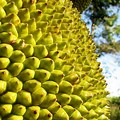

In [14]:
#Lightning
lightning = Image.open('/content/fruit_dataset/Dataset2C/cempedak/30.jpg')
lightning

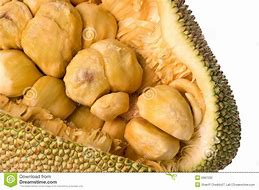

In [15]:
#Occulation
oklusi = Image.open('/content/fruit_dataset/Dataset2C/cempedak/421.jpg')
oklusi

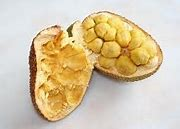

In [16]:
#Background
bg = Image.open('/content/fruit_dataset/Dataset2C/cempedak/313.jpg')
bg

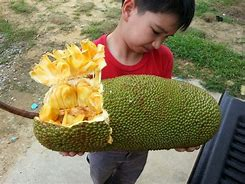

In [17]:
#Angle & perspective
angle = Image.open('/content/fruit_dataset/Dataset2C/cempedak/113.jpg')
angle

## Baseline Architecture using VGG-16


In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import  EarlyStopping


VggModel = Sequential([
    Conv2D(64,(3,3),input_shape = (224,224,3),activation = 'relu'),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation = 'relu'),
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation = 'relu'),
    Conv2D(256,(3,3),activation = 'relu'),
    Conv2D(256,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(512,(3,3),activation = 'relu'),
    Conv2D(512,(3,3),activation = 'relu'),
    Conv2D(512,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(512,(3,3),activation = 'relu'),
    Conv2D(512,(3,3),activation = 'relu'),
    Conv2D(512,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(4096),
    Dense(4096),
    Dense(4,activation= 'softmax')
])

losses = tf.keras.losses.CategoricalCrossentropy()

VggModel.compile(loss = losses, optimizer = 'adam',metrics=['accuracy'])
VggModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 47, 47, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 19, 19, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 17, 17, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,613,636 (128.23 MB)

 Trainable params: 33,613,636 (128.23 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', patience=3, baseline=0.8)]
VggModel.fit(train_generate, validation_data = val_generate,epochs=3,callbacks = callbacks)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 1940s 12s/step - accuracy: 0.2561 - loss: 1.5137 - val_accuracy: 0.2484 - val_loss: 1.3912
Epoch 2/3
161/161 ━━━━━━━━━━━━━━━━━━━━ 1924s 12s/step - accuracy: 0.2641 - loss: 1.3929 - val_accuracy: 0.2484 - val_loss: 1.4082
Epoch 3/3
161/161 ━━━━━━━━━━━━━━━━━━━━ 1888s 12s/step - accuracy: 0.2636 - loss: 1.3956 - val_accuracy: 0.2484 - val_loss: 1.4357


In [20]:
unique_labels = list(test_generate.class_indices.keys())
y_pred_vgg = VggModel.predict(test_generate).argmax(axis = 1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step


In [21]:
from sklearn.metrics import classification_report
print(classification_report(true_classes,y_pred_vgg ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        40
           3       0.25      1.00      0.40        40

    accuracy                           0.25       161
   macro avg       0.06      0.25      0.10       161
weighted avg       0.06      0.25      0.10       161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Berdasarkan hasil evaluasi dengan data test, Hasil performa dari model pertama sangat jelek. Akurasi hanya 0.25 dan semua gambar yang diprediksi model adalah gambar 0 , yang  dimana adalah cashew

## Modified VGG-16 Architecture & Hypertuning Parameter

In [22]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [23]:
import keras_tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def model_vgg_modif(hp):
    filter_1 = hp.Int('filter', min_value=16, max_value=32, step=16)
    filter_2 = hp.Int('filter2', min_value=32, max_value=64, step=16)
    filter_3 = hp.Int('filter3', min_value=64, max_value=128, step=16)
    units = hp.Int('units', min_value=64, max_value=128, step=64)

    model_vgg = Sequential([
        Conv2D(filter_1,(3,3),input_shape = (224,224,3),activation = 'relu'),
        Conv2D(filter_1,(3,3),activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),
        Conv2D(filter_2,(3,3),activation = 'relu'),
        Conv2D(filter_2,(3,3),activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),
        Conv2D(filter_3,(3,3),activation = 'relu'),
        Conv2D(filter_3,(3,3),activation = 'relu'),
        # Removed one Conv2D layer
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),
        Flatten(),
        Dense(units,activation = 'relu'),
        Dropout(0.4),
        # Removed one Dense Layer
        Dense(4,activation= 'softmax')
    ])
    model_vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model_vgg

In [24]:
hypertune = keras_tuner.RandomSearch(model_vgg_modif,objective='val_accuracy',max_trials=3,max_consecutive_failed_trials=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
hypertune.search(train_generate, epochs=2, validation_data=val_generate,batch_size=16)

Trial 3 Complete [00h 09m 19s]
val_accuracy: 0.30434781312942505

Best val_accuracy So Far: 0.31677019596099854
Total elapsed time: 00h 30m 57s


In [26]:
model = hypertune.get_best_models()[0]
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 220, 220, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 106, 106, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 96)          │          27,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 49, 49, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 55296)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,539,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,679,332 (14.04 MB)

 Trainable params: 3,679,012 (14.03 MB)

 Non-trainable params: 320 (1.25 KB)

## Evaluation

In [27]:
y_pred_vgg_modif = model.predict(test_generate).argmax(axis = 1)
print(classification_report(true_classes,y_pred_vgg_modif))

21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 492ms/step
              precision    recall  f1-score   support

           0       0.32      0.61      0.42        41
           1       0.00      0.00      0.00        40
           2       0.12      0.03      0.04        40
           3       0.28      0.53      0.37        40

    accuracy                           0.29       161
   macro avg       0.18      0.29      0.21       161
weighted avg       0.18      0.29      0.21       161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
